In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
pd

<module 'pandas' from 'C:\\Users\\Tommy\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\pandas\\__init__.py'>

In [6]:
df_data = pd.read_csv('insurance.csv')
df_data = df_data.drop(labels=['region'],axis=1)
df_data = df_data.drop(labels=['children'],axis=1)
#transform catorical to quiantitive
labelMapSex= {'female':0, 'male':1}
labelMapSmoker= {'yes':1, 'no':0}
df_data['SexRevised'] = df_data['sex'].map(labelMapSex)
df_data['SmokerRevised'] = df_data['smoker'].map(labelMapSmoker)
df_data = df_data.drop(labels=['sex'],axis=1)
df_data = df_data.drop(labels=['smoker'],axis=1)

In [7]:
df_data

,age,bmi,charges,SexRevised,SmokerRevised
0,19,27.900,16884.92400,0,1
1,18,33.770,1725.55230,1,0
2,28,33.000,4449.46200,1,0
3,33,22.705,21984.47061,1,0
4,32,28.880,3866.85520,1,0
...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0
1334,18,31.920,2205.98080,0,0
1335,18,36.850,1629.83350,0,0
1336,21,25.800,2007.94500,0,0


In [9]:
'''
remove loss val
train=train.dropna()'''

'\nremove loss val\ntrain=train.dropna()'

In [14]:
x=df_data
print('checked missing data(NAN mount):', len(np.where(np.isnan(x))[0]))

checked missing data(NAN mount): 0


In [34]:
#切割訓練集與測試集
from sklearn.model_selection import train_test_split
x=df_data
y=df_data['SexRevised'].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3 , random_state=40) #test_size 表示7:3=train:test

In [35]:
df_data

,age,bmi,charges,SexRevised,SmokerRevised
0,19,27.900,16884.92400,0,1
1,18,33.770,1725.55230,1,0
2,28,33.000,4449.46200,1,0
3,33,22.705,21984.47061,1,0
4,32,28.880,3866.85520,1,0
...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0
1334,18,31.920,2205.98080,0,0
1335,18,36.850,1629.83350,0,0
1336,21,25.800,2007.94500,0,0


In [36]:
'''
set up Logoistic Regression module
Parameter:
penalty: normalize 1/12, preventing module is too fitting
C: value is bigger will be weak to control the, default is 1
n_init: default is ten times randomly initialization, chooose better effect as our module
solver: optimizer options. newton-cg, lbfgs, liblinear, sag, saga. default is liblinear
max_iter: iteration time default 100 times
class_weight: conquer unstable data can set balance, default=None
random_state: random seed only can be use in solver=sag/liblinear

Attribute:
coef_: get slope
intercept: get intercept

Methods:
fit: input x,y into module to fit it
predict: predict and return predicted class
predict_proba: predict probability of each category
score: predict successful preportion'''


'\nset up Logoistic Regression module\nParameter:\npenalty: normalize 1/12, preventing module is too fitting\nC: value is bigger will be weak to control the, default is 1\nn_init: default is ten times randomly initialization, chooose better effect as our module\nsolver: optimizer options. newton-cg, lbfgs, liblinear, sag, saga. default is liblinear\nmax_iter: iteration time default 100 times\nclass_weight: conquer unstable data can set balance, default=None\nrandom_state: random seed only can be use in solver=sag/liblinear\n\nAttribute:\ncoef_: get slope\nintercept: get intercept\n\nMethods:\nfit: input x,y into module to fit it\npredict: predict and return predicted class\npredict_proba: predict probability of each category\nscore: predict successful preportion'

In [37]:
from sklearn.linear_model import LogisticRegression

logisticModel= LogisticRegression(random_state=0)
logisticModel.fit(x_train, y_train)
predicted= logisticModel.predict(x_train)

In [39]:
print('train set: ', logisticModel.score(x_train, y_train))
print('test set: ',logisticModel.score(x_test, y_test))

train set:  1.0
test set:  1.0


In [41]:
#build up DataFrame
df_train=pd.DataFrame(x_train)
df_train['SmokerRevised']=y_train
#build up DataFrame
df_test=pd.DataFrame(x_test)
df_test['SmokerRevised']=y_test

C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


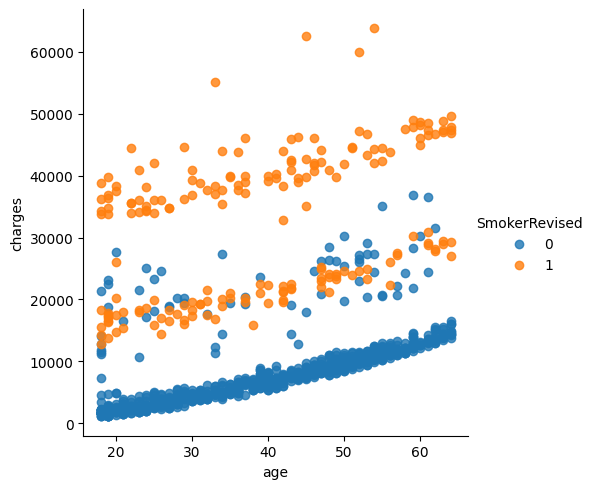

In [43]:
# real module
sns.lmplot('age','charges',hue='SmokerRevised',data=df_train,fit_reg=False)

C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


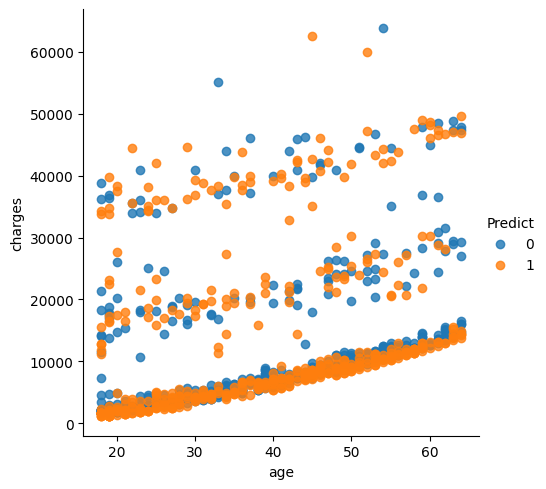

In [46]:
# predicted module
df_train['Predict']=predicted
sns.lmplot('age','charges',data=df_train,hue='Predict',fit_reg=False)
plt.show()